In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator

In [2]:
path = 'startup_funding.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


### Question

Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [4]:
test1 = df.copy()

In [5]:
#filtering na
test1.dropna(inplace = True, subset = ['CityLocation'])
test1.reset_index(drop = True, inplace = True)
test1.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [6]:
#function to split indian cities from string
def ind_city(city):
    return city.split('/')[0].strip()

In [7]:
#replacing the wrong written city
test1['CityLocation'].replace("bangalore", "Bangalore", inplace = True)
test1['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
test1['CityLocation'].replace("SFO / Bangalore", "Bangalore", inplace = True)
test1['CityLocation'].replace("Seattle / Bangalore", "Bangalore", inplace = True)

In [8]:
test1['CityLocation'].isin(['Hyderabad']).any()

True

In [9]:
#filtering city
test1['CityLocation'] = test1['CityLocation'].apply(ind_city)
test1.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [10]:
test1['CityLocation'].isin(['Dallas']).any()

True

In [11]:
#filtering the cities on the basis of given conditions
test1 = test1[(test1['CityLocation'] == "Bangalore") | (test1['CityLocation'] == "Mumbai") | (test1['CityLocation'] == "Gurgaon") | (test1['CityLocation'] == "Noida") | (test1['CityLocation'] == "New Delhi")]

In [12]:
#extracting the cities and their counts
temp = test1['CityLocation'].value_counts()
city = temp.index
No_Of_Funding = temp.values
temp

Bangalore    637
Mumbai       449
New Delhi    389
Gurgaon      241
Noida         79
Name: CityLocation, dtype: int64

In [13]:
#printing the city where most number of funding is Done
print("City where most number of funding is done among Bangalore, Mumbai and NCR is '",city[0],"'.")

City where most number of funding is done among Bangalore, Mumbai and NCR is ' Bangalore '.


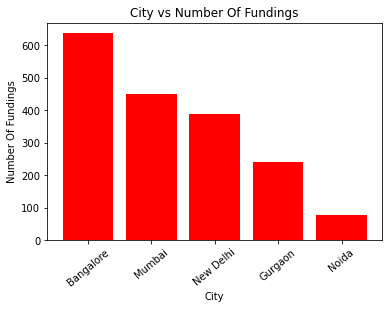

,Name Of City,Number Of Fundings
0,Bangalore,637
1,Mumbai,449
2,New Delhi,389
3,Gurgaon,241
4,Noida,79


In [14]:
#bar Graph
plt.bar(city, No_Of_Funding, color = ['Red'], width = 0.8)
plt.xlabel("City")
plt.xticks(rotation = 40)
plt.ylabel("Number Of Fundings")
plt.title("City vs Number Of Fundings")
plt.show()
li = list(zip(city, No_Of_Funding))

#build pandas dataframe for the city and corresponding investments
freq = pd.DataFrame(li, columns = ["Name Of City", "Number Of Fundings"])
freq